In [34]:
%load_ext autoreload
%autoreload complete

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
import matplotlib.pyplot as plt
import pandas as pd

from src.models.synthetic_region.hyperopt import get_study_df

df = get_study_df("synth_single_protests_v3452353")
df

,number,value,datetime_start,datetime_complete,duration,alpha,fit_method,interpretable,lags,max_depth,max_features,method,min_samples_leaf,min_samples_split,n_estimators,normalize,readjust,socioeconomic_method,training_interval,use_autoregressor,weekdays,admin1,assoc_actor_1,co_terms,comparison_df,discourse_type,end_date,event_date,impact_14_days,impact_1_days,impact_21_days,impact_28_days,impact_2_days,impact_3_days,impact_7_days,location,n_control_regions,notes,prediction_interval,protest_group,region_code,rmse_dev,rmse_test,seed,size,source,start_date,sub_event_type,weekday,system_attrs_grid_id,system_attrs_search_space,state
39,39,2.716196,2023-04-29 23:36:40.868058,2023-04-29 23:36:51.955486,0 days 00:00:11.087428,NaN,NaN,NaN,NaN,NaN,NaN,gam,NaN,NaN,NaN,power,NaN,NaN,336.0,NaN,dummies,Sachsen,FFF: Fridays for Future; Students (Germany),[],"{""true"":{""-336"":3,""-335"":1,""-334"":1,""-333"":3,""...",protest_focused,2022-12-31,2020-09-25T00:00:00,-0.448943,-18.242802,-0.389547,-0.275106,-8.812610,-5.867945,-1.957720,Leipzig,6.0,"On 25 September 2020, Fridays for Future activ...",28.0,fff,SN,2.716196,4.057691,20230413.0,NaN,mediacloud,2020-01-01,Peaceful protest,Friday,2147969.0,"{'alpha': [0.001, 0.1, 0.5], 'fit_method': ['v...",COMPLETE
51,51,2.823129,2023-04-29 23:53:04.737312,2023-04-29 23:53:12.586872,0 days 00:00:07.849560,NaN,NaN,NaN,NaN,20.0,log2,random_forest,1.0,10.0,100.0,standard,NaN,NaN,84.0,False,None,Sachsen,FFF: Fridays for Future; Students (Germany),[],"{""true"":{""-84"":9,""-83"":0,""-82"":2,""-81"":1,""-80""...",protest_focused,2022-12-31,2020-09-25T00:00:00,-0.085295,-19.166178,-0.101408,0.029177,-9.308656,-5.794077,-1.754155,Leipzig,6.0,"On 25 September 2020, Fridays for Future activ...",28.0,fff,SN,2.823129,4.239573,20230413.0,NaN,mediacloud,2020-01-01,Peaceful protest,Friday,6016112.0,"{'alpha': [0.001, 0.1, 0.5], 'fit_method': ['v...",COMPLETE
52,52,3.389627,2023-04-29 23:53:12.609758,2023-04-29 23:53:20.248212,0 days 00:00:07.638454,NaN,NaN,False,NaN,NaN,NaN,ridge,NaN,NaN,NaN,power,NaN,NaN,28.0,False,None,Sachsen,FFF: Fridays for Future; Students (Germany),[],"{""true"":{""-28"":5,""-27"":3,""-26"":2,""-25"":2,""-24""...",protest_focused,2022-12-31,2020-09-25T00:00:00,-0.135431,-17.493597,-0.108964,0.054852,-8.131218,-4.932176,-1.628249,Leipzig,6.0,"On 25 September 2020, Fridays for Future activ...",28.0,fff,SN,3.389627,4.022391,20230413.0,NaN,mediacloud,2020-01-01,Peaceful protest,Friday,19565232.0,"{'alpha': [0.001, 0.1, 0.5], 'fit_method': ['v...",COMPLETE
56,56,3.141358,2023-04-30 00:21:05.801670,2023-04-30 00:21:15.259509,0 days 00:00:09.457839,NaN,NaN,NaN,NaN,NaN,NaN,gam,NaN,NaN,NaN,robust,NaN,NaN,28.0,NaN,None,Sachsen,FFF: Fridays for Future; Students (Germany),[],"{""true"":{""-28"":5,""-27"":3,""-26"":2,""-25"":2,""-24""...",protest_focused,2022-12-31,2020-09-25T00:00:00,-1.332352,-21.962857,-1.050069,-0.742234,-12.148890,-8.273954,-3.462690,Leipzig,6.0,"On 25 September 2020, Fridays for Future activ...",28.0,fff,SN,3.141358,4.597191,20230413.0,NaN,mediacloud,2020-01-01,Peaceful protest,Friday,158740.0,"{'alpha': [0.001, 0.1, 0.5], 'fit_method': ['v...",COMPLETE
60,60,3.591655,2023-04-30 00:26:05.744013,2023-04-30 00:26:17.988267,0 days 00:00:12.244254,NaN,NaN,NaN,NaN,NaN,NaN,gam,NaN,NaN,NaN,standard,NaN,NaN,84.0,NaN,dummies,Sachsen,FFF: Fridays for Future; Students (Germany),[],"{""true"":{""-84"":9,""-83"":0,""-82"":2,""-81"":1,""-80""...",protest_focused,2022-12-31,2020-09-25T00:00:00,1.614166,-0.397029,0.924495,0.876702,0.463470,0.520888,1.708765,Leipzig,6.0,"On 25 September 2020, Fridays for Future activ...",28.0,fff,SN,3.591655,2.681283,20230413.0,NaN,mediacloud,2020-01-01,Peaceful protest,Friday,5346921.0,"{'alpha': [0.001, 0.1, 0.5], 'fit_method': ['v...",COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,118

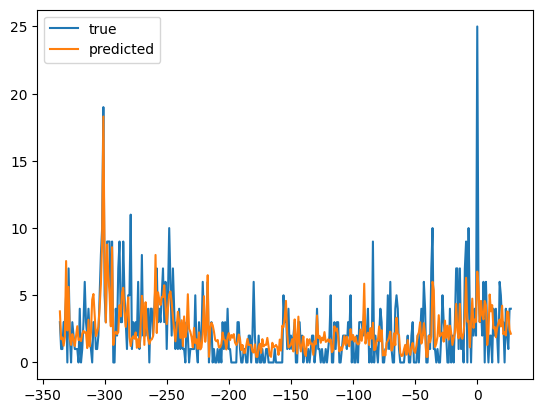

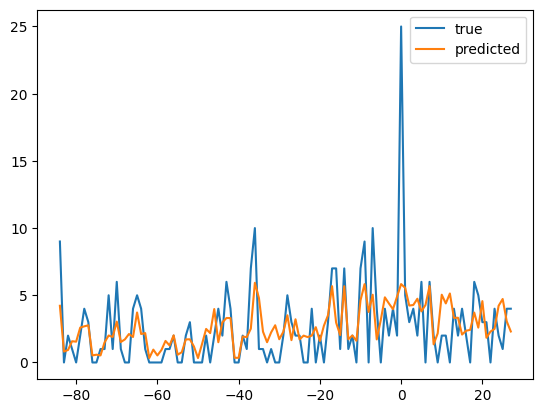

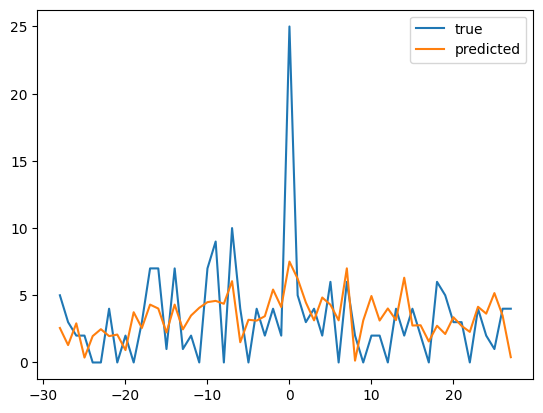

In [36]:
for row in df["comparison_df"][:3]:
    comparison_df = pd.read_json(row)
    comparison_df.plot()
    plt.show()

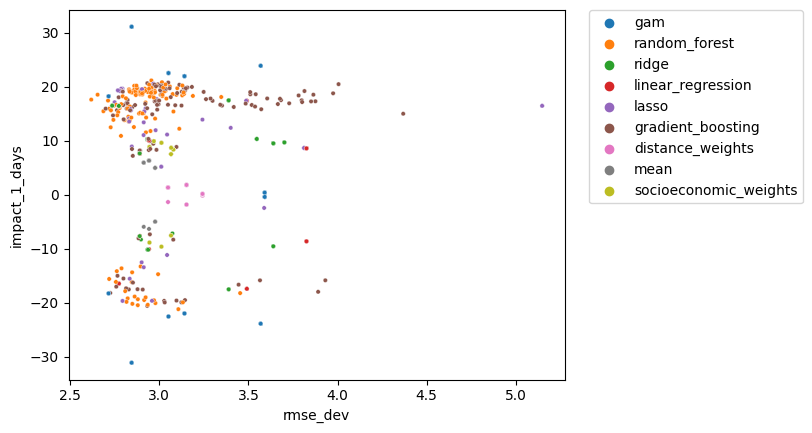

In [44]:
import seaborn as sns

# make smaller dots
sns.scatterplot(data=df, x="rmse_dev", y="impact_1_days", hue="method", s=10)

# place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

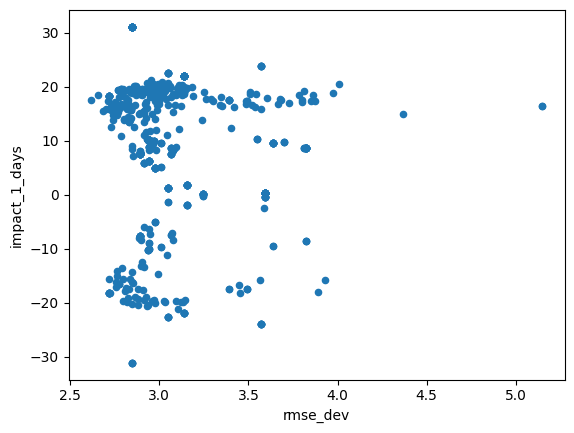

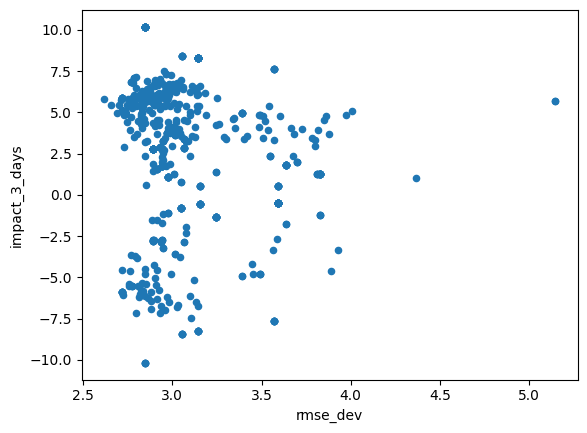

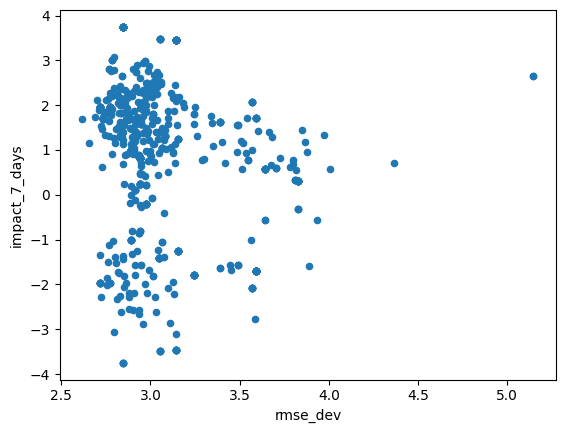

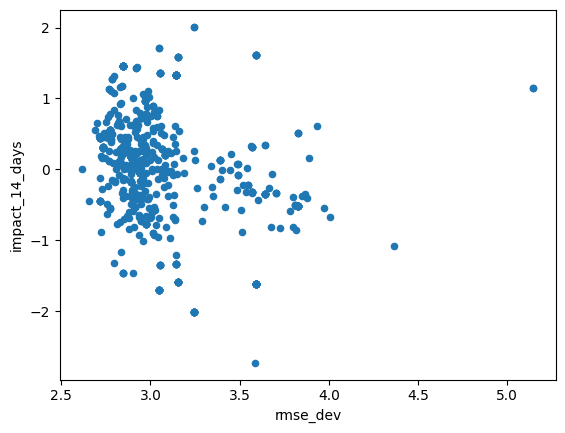

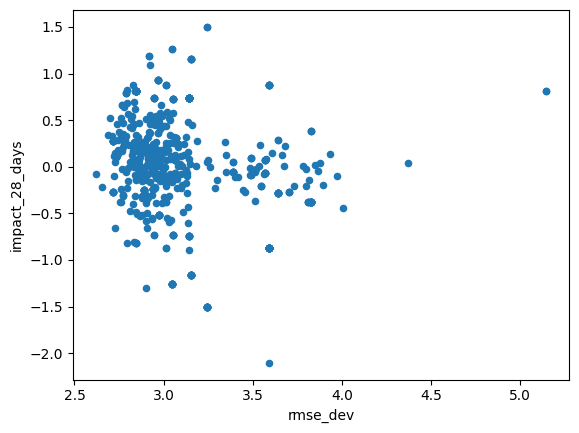

In [38]:
df.plot.scatter("rmse_dev", "impact_1_days")
plt.show()
df.plot.scatter("rmse_dev", "impact_3_days")
plt.show()
df.plot.scatter("rmse_dev", "impact_7_days")
plt.show()
df.plot.scatter("rmse_dev", "impact_14_days")
plt.show()
df.plot.scatter("rmse_dev", "impact_28_days")
plt.show()

In [39]:
df[["rmse_dev", "method"]].sort_values("rmse_dev").head(50)

,rmse_dev,method
441,2.618451,random_forest
654,2.654357,random_forest
582,2.686727,random_forest
1150,2.699556,gradient_boosting
664,2.712714,random_forest
39,2.716196,gam
612,2.716196,gam
630,2.716196,gam
968,2.716196,gam
1074,2.716196,gam


In [40]:
df["size"].unique(), df["discourse_type"].unique()

(array([nan]), array(['protest_focused'], dtype=object))

## Grounded methods

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

from src.models.synthetic_region.hyperopt import get_study_df

df = get_study_df("synth_single_protests_v938493984")
df

,number,value,datetime_start,datetime_complete,duration,distance__inverse,interpretable,method,normalize,socioeconomic__k,socioeconomic__method,training_interval,use_autoregressor,weekdays,admin1,assoc_actor_1,co_terms,comparison_df,discourse_type,end_date,event_date,impact_14_days,impact_1_days,impact_21_days,impact_28_days,impact_2_days,impact_3_days,impact_7_days,location,n_control_regions,notes,prediction_interval,protest_group,region_code,relative_impact_14_days,relative_impact_1_days,relative_impact_21_days,relative_impact_28_days,relative_impact_2_days,relative_impact_3_days,relative_impact_7_days,rmse_dev,rmse_test,rrmse_dev,rrmse_test,seed,size,source,start_date,sub_event_type,weekday,system_attrs_grid_id,system_attrs_search_space,state
0,0,0.870546,2023-04-30 18:03:04.318281,2023-04-30 18:03:04.510481,0 days 00:00:00.192200,NaN,False,ridge,power,NaN,NaN,84.0,False,None,Sachsen,FFF: Fridays for Future; Students (Germany),[],"{""true"":{""-84"":9,""-83"":0,""-82"":2,""-81"":1,""-80""...",protest_focused,2022-12-31,2020-09-25T00:00:00,0.316183,16.490485,0.249443,0.122650,7.922901,4.997716,1.722979,Leipzig,6,"On 25 September 2020, Fridays for Future activ...",28,fff,SN,0.078244,1.937888,0.067364,0.035199,1.119512,0.832636,0.366156,2.736001,3.702085,0.870546,1.026321,20230413,NaN,mediacloud,2020-01-01,Peaceful protest,Friday,2212,"{'distance__inverse': [False, True], 'interpre...",COMPLETE
4,4,0.882472,2023-04-30 18:05:17.269349,2023-04-30 18:05:17.508038,0 days 00:00:00.238689,NaN,False,ridge,power,NaN,NaN,336.0,False,None,Sachsen,FFF: Fridays for Future; Students (Germany),[],"{""true"":{""-336"":3,""-335"":1,""-334"":1,""-333"":3,""...",protest_focused,2022-12-31,2020-09-25T00:00:00,0.551966,16.449889,0.385785,0.310461,8.329203,5.508790,1.961394,Leipzig,6,"On 25 September 2020, Fridays for Future activ...",28,fff,SN,0.145056,1.923939,0.108166,0.094174,1.248607,1.003202,0.439068,2.773483,3.733983,0.882472,1.035164,20230413,NaN,mediacloud,2020-01-01,Peaceful protest,Friday,2213,"{'distance__inverse': [False, True], 'interpre...",COMPLETE
8,8,1.078518,2023-04-30 18:07:24.375147,2023-04-30 18:07:24.582328,0 days 00:00:00.207181,NaN,False,ridge,power,NaN,NaN,28.0,False,None,Sachsen,FFF: Fridays for Future; Students (Germany),[],"{""true"":{""-28"":5,""-27"":3,""-26"":2,""-25"":2,""-24""...",protest_focused,2022-12-31,2020-09-25T00:00:00,0.135431,17.493597,0.108964,-0.054852,8.131218,4.932176,1.628249,Leipzig,6,"On 25 September 2020, Fridays for Future activ...",28,fff,SN,0.032080,2.330490,0.028351,-0.014979,1.183793,0.812841,0.339196,3.389627,4.022391,1.078518,1.115118,20230413,NaN,mediacloud,2020-01-01,Peaceful protest,Friday,2214,"{'distance__inverse': [False, True], 'interpre...",COMPLETE
11,11,4.992767,2023-04-30 18:07:24.733128,2023-04-30 18:07:24.859099,0 days 00:00:00.125971,NaN,NaN,socioeconomic,mean,5.0,ols,28.0,NaN,None,Sachsen,FFF: Fridays for Future; Students (Germany),[],"{""true"":{""-28"":5,""-27"":3,""-26"":2,""-25"":2,""-24""...",protest_focused,2022-12-31,2020-09-25T00:00:00,-12.899301,-123.355522,-14.798505,-9.977540,-54.036076,-33.571290,-11.637197,Leipzig,6,"On 25 September 2020, Fridays for Future activ...",28,fff,SN,-0.747506,-0.831486,-0.789216,-0.734470,-0.782722,-0.753204,-0.644157,15.691553,41.721557,4.992767,11.566372,20230413,NaN,mediacloud,2020-01-01,Peaceful protest,Friday,2781,"{'distance__inverse': [False, True], 'interpre...",COMPLETE
12,12,0.947151,2023-04-30 18:07:24.873938,2023-04-30 18:07:24.984344,0 days 00:00:00.110406,NaN,NaN,mean,none,NaN,NaN,84.0,NaN,None,Sachsen,FFF: Fridays for Future; Students (Germany),[],"{""true"":{""-84"":9,""-83"":0,""-82"":2,""-81"":1,""-80""...",protest_focused,2022-12-31,2020-09-25T00:00:00,-0.776547,4.978610,-0.582378,-0.518144,1.909091,1.074866,-0.208556,Leipzig,6,"On 25 September 2020, Fridays for Future activ...",28,fff,SN,-0.151265,0.248665,-0.128425,-0.125602,0.145833,0.108297,-0.031423,2.976759,2.394674,0.947151,0.663870,20230413,NaN,mediacloud,20

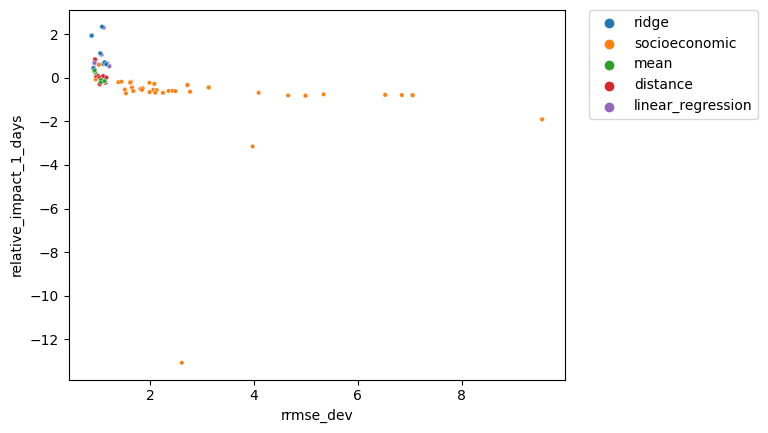

In [54]:
import seaborn as sns

sns.scatterplot(data=df, x="rrmse_dev", y="relative_impact_1_days", hue="method", s=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

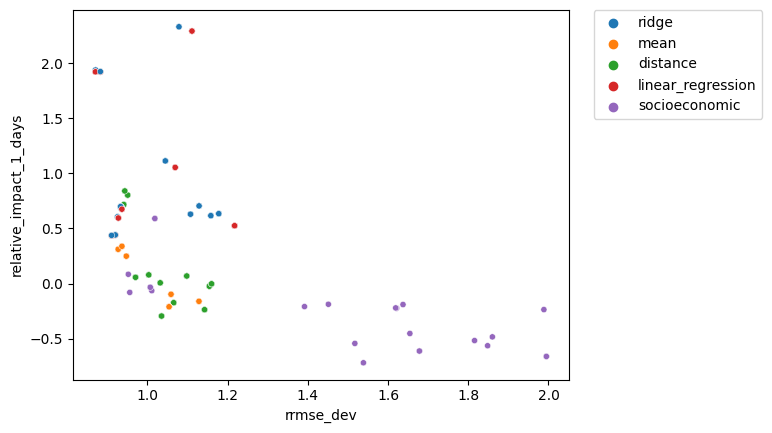

In [55]:
sns.scatterplot(
    data=df[df["rrmse_dev"] < 2],
    x="rrmse_dev",
    y="relative_impact_1_days",
    hue="method",
    s=20,
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

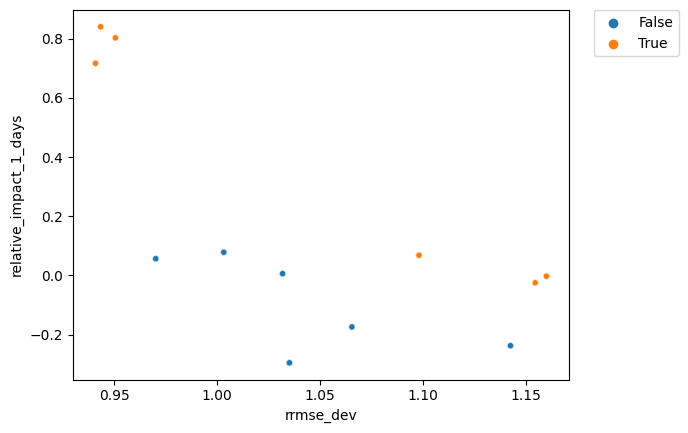

In [56]:
sns.scatterplot(
    data=df[df["method"] == "distance"],
    x="rrmse_dev",
    y="relative_impact_1_days",
    hue="distance__inverse",
    s=20,
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

Distance has an effect on the impact!

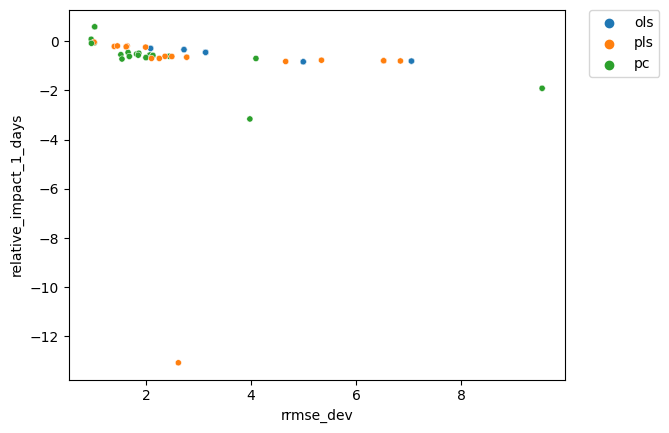

In [57]:
sns.scatterplot(
    data=df[df["method"] == "socioeconomic"],
    x="rrmse_dev",
    y="relative_impact_1_days",
    hue="socioeconomic__method",
    s=20,
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

OLS

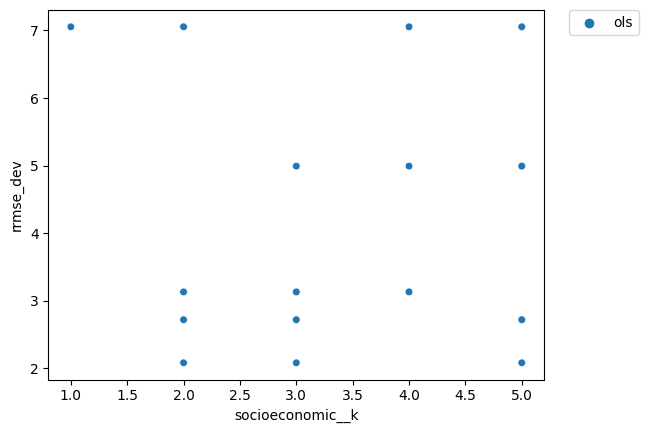

In [62]:
sns.scatterplot(
    data=df[(df["method"] == "socioeconomic") & (df["socioeconomic__method"] == "ols")],
    x="socioeconomic__k",
    y="rrmse_dev",
    hue="socioeconomic__method",
    s=30,
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

PLS

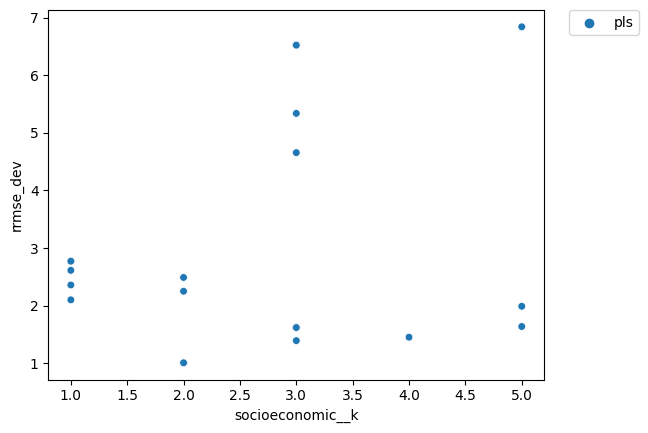

In [64]:
sns.scatterplot(
    data=df[(df["method"] == "socioeconomic") & (df["socioeconomic__method"] == "pls")],
    x="socioeconomic__k",
    y="rrmse_dev",
    hue="socioeconomic__method",
    s=30,
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

PC

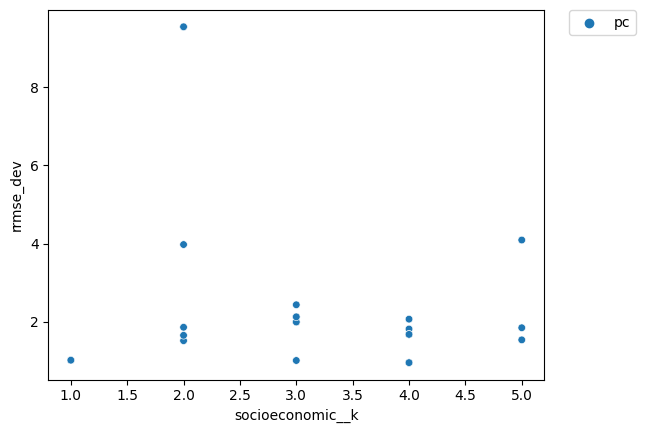

In [65]:
sns.scatterplot(
    data=df[(df["method"] == "socioeconomic") & (df["socioeconomic__method"] == "pc")],
    x="socioeconomic__k",
    y="rrmse_dev",
    hue="socioeconomic__method",
    s=30,
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

In [85]:
df_ = df[(df["method"] == "socioeconomic") & (df["socioeconomic__method"] == "pc")]
df_ = df_.drop(columns=["co_terms", "system_attrs_search_space"])

# find the subset of columns that are the same for all rows
uniq = (df_.nunique() > 1) & (df_.nunique() < 18)
uniq = uniq[uniq].index.tolist()
df_[["rrmse_dev", *uniq]].sort_values("rrmse_dev").head(50)

,rrmse_dev,normalize,socioeconomic__k,training_interval
110,0.952183,none,4.0,336.0
530,0.955790,none,4.0,28.0
188,1.010710,none,3.0,336.0
368,1.018347,none,1.0,84.0
533,1.018347,none,1.0,84.0
93,1.517159,mean,2.0,28.0
181,1.538485,none,5.0,28.0
742,1.654378,mean,2.0,336.0
793,1.678131,mean,4.0,28.0
321,1.678131,mean,4.0,28.0
